In [164]:
import pandas as pd
from numpy import percentile
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import scipy.stats as stats
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [143]:
# read data
data = pd.read_csv("../data/train.csv")

In [144]:
# put salesprice on first position
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [145]:
display(data.columns.tolist())
display(cols)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

['SalePrice',
 'Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',


In [146]:
# display sample data entries
data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
814,815,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,7,1918,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,686,686,GasW,Gd,Y,SBrkr,686,564,0,1250,0,1,1,1,3,1,Fa,7,Typ,0,NaN,Detchd,1955.0,Unf,1,280,TA,TA,P,207,0,96,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,116000
631,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,108.0,Gd,TA,PConc,Gd,Gd,Mn,GLQ,24,Unf,0,1530,1554,GasA,Ex,Y,SBrkr,1554,0,0,1554,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,627,TA,TA,Y,156,73,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
414,415,60,RL,59.0,11228,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,BLQ,50,GLQ,531,499,1080,GasA,Ex,Y,SBrkr,1080,1017,0,2097,0,1,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1993.0,Unf,3,678,TA,TA,Y,196,187,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,228000
509,510,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,MetalSd,MetalSd,BrkFace,132.0,TA,TA,CBlock,TA,TA,No,ALQ,991,Unf,0,50,1041,GasA,Ex,Y,SBrkr,1041,0,0,1041,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,1,270,TA,TA,Y,224,88,0,0,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,124500
616,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,457,Unf,0,326,783,GasA,Ex,Y,SBrkr,807,702,0,1509,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,2,393,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200
1306,1307,120,RL,48.0,6955,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,94.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1368,1368,GasA,Ex,Y,SBrkr,1368,0,0,1368,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,2,474,TA,TA,Y,132,35,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,202500
411,412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,5,5,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Mn,Rec,1056,Unf,0,0,1056,GasA,TA,N,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1955.0,Fin,2,572,TA,TA,Y,264,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,145000
842,843,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkFace,183.0,TA,TA,CBlock,TA,TA,Gd,Rec,312,ALQ,539,276,1127,GasA,TA,Y,SBrkr,1165,0,0,1165,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,RFn,2,490,Gd,Gd,Y,0,129,0,0,0,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,174900
832,833,60,RL,44.0,9548,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,223.0,Gd,TA,

In [147]:
# split categorical and numerical data
data_categorical = pd.concat([data['SalePrice'], data.select_dtypes(include=[object])], axis=1)
data_numerical = data.select_dtypes(exclude=[object])

display("categorical", len(data_categorical.columns))
display("numerical", len(data_numerical.columns))

'categorical'

44

'numerical'

38

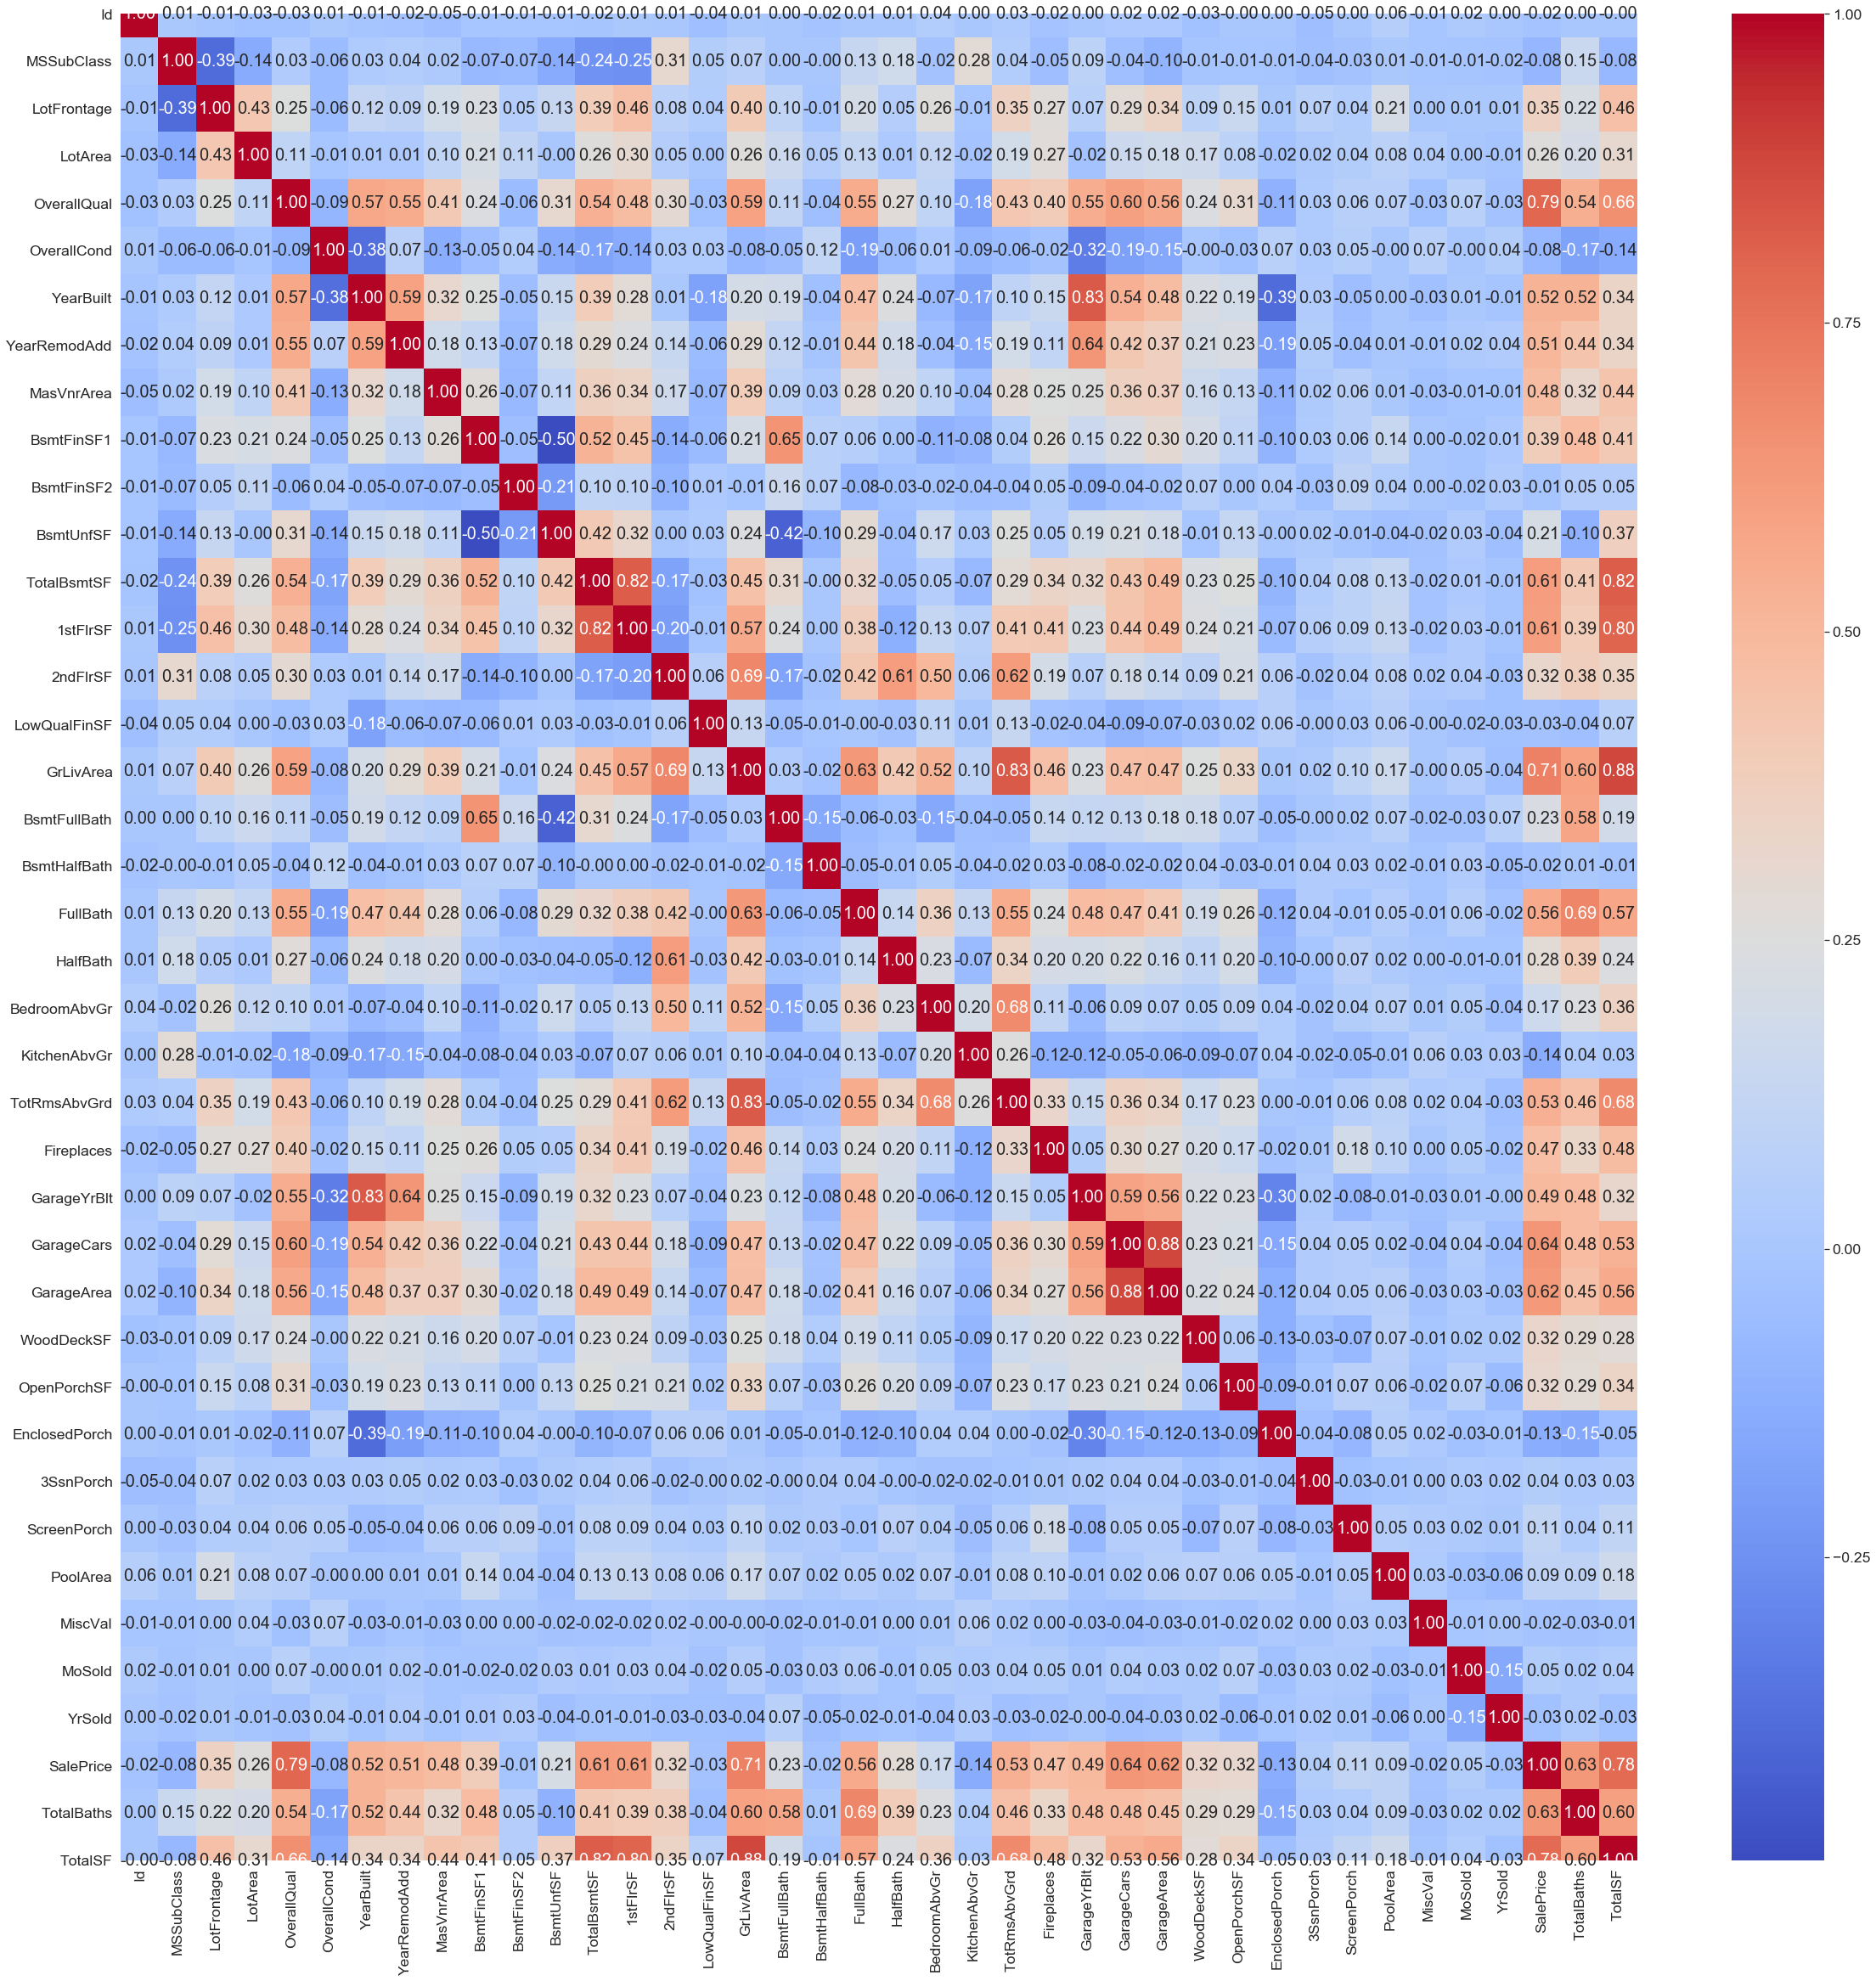

In [160]:
plt.figure(figsize=(40,40))
sns.set(font_scale=1.6)
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 20})



In [151]:
# list all numerical columns that get to remain
sns.set()
chosen_cols_numerical = ['OverallQual', 'GrLivArea', 'GarageCars',
        'FullBath', 'YearBuilt', 'Fireplaces', 'TotalBaths', 'TotalSF']
# sns.pairplot(data[chosen_cols_numerical], size = 2.5)

In [152]:
# see what cols have missing values
iter_data = data_categorical
data_cols = list(iter_data.columns)
counter = 1
for colname in data_cols:
    if colname == 'Id' or colname == 'SalePrice': continue
    col_values = list(iter_data[colname].unique())
    if np.nan in col_values or iter_data[colname].isna().sum() > 0:
        display(">>NAN {}. {} - {} : {}".format(counter, colname, data[colname].dtype , col_values))
    else: 
        display("{}. {} - {} : {}".format(counter, colname, data[colname].dtype , col_values))
        
    counter+=1

"1. MSZoning - object : ['RL', 'RM', 'C (all)', 'FV', 'RH']"

"2. Street - object : ['Pave', 'Grvl']"

"3. Alley - object : ['0', 'Grvl', 'Pave']"

"4. LotShape - object : ['Reg', 'IR1', 'IR2', 'IR3']"

"5. LandContour - object : ['Lvl', 'Bnk', 'Low', 'HLS']"

"6. Utilities - object : ['AllPub', 'NoSeWa']"

"7. LotConfig - object : ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']"

"8. LandSlope - object : ['Gtl', 'Mod', 'Sev']"

"9. Neighborhood - object : ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']"

"10. Condition1 - object : ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']"

"11. Condition2 - object : ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']"

"12. BldgType - object : ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']"

"13. HouseStyle - object : ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']"

"14. RoofStyle - object : ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']"

"15. RoofMatl - object : ['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile']"

"16. Exterior1st - object : ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']"

"17. Exterior2nd - object : ['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng', 'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone', 'Other', 'CBlock']"

">>NAN 18. MasVnrType - object : ['BrkFace', 'None', 'Stone', 'BrkCmn', nan]"

"19. ExterQual - object : ['Gd', 'TA', 'Ex', 'Fa']"

"20. ExterCond - object : ['TA', 'Gd', 'Fa', 'Po', 'Ex']"

"21. Foundation - object : ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']"

"22. BsmtQual - object : ['Gd', 'TA', 'Ex', '0', 'Fa']"

"23. BsmtCond - object : ['TA', 'Gd', '0', 'Fa', 'Po']"

"24. BsmtExposure - object : ['No', 'Gd', 'Mn', 'Av', '0']"

"25. BsmtFinType1 - object : ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', '0', 'LwQ']"

"26. BsmtFinType2 - object : ['Unf', 'BLQ', '0', 'ALQ', 'Rec', 'LwQ', 'GLQ']"

"27. Heating - object : ['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor']"

"28. HeatingQC - object : ['Ex', 'Gd', 'TA', 'Fa', 'Po']"

"29. CentralAir - object : ['Y', 'N']"

">>NAN 30. Electrical - object : ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]"

"31. KitchenQual - object : ['Gd', 'TA', 'Ex', 'Fa']"

"32. Functional - object : ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev']"

"33. FireplaceQu - object : ['0', 'TA', 'Gd', 'Fa', 'Ex', 'Po']"

"34. GarageType - object : ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', '0', 'Basment', '2Types']"

"35. GarageFinish - object : ['RFn', 'Unf', 'Fin', '0']"

"36. GarageQual - object : ['TA', 'Fa', 'Gd', '0', 'Ex', 'Po']"

"37. GarageCond - object : ['TA', 'Fa', '0', 'Gd', 'Po', 'Ex']"

"38. PavedDrive - object : ['Y', 'N', 'P']"

"39. PoolQC - object : ['0', 'Ex', 'Fa', 'Gd']"

"40. Fence - object : ['0', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']"

"41. MiscFeature - object : ['0', 'Shed', 'Gar2', 'Othr', 'TenC']"

"42. SaleType - object : ['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth']"

"43. SaleCondition - object : ['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']"

In [150]:
# replace missing values
data_categorical['BsmtQual'].fillna('0', inplace=True)
data_categorical['Alley'].fillna('0', inplace=True)
data_categorical['BsmtCond'].fillna('0', inplace=True)
data_categorical['BsmtExposure'].fillna('0', inplace=True)
data_categorical['BsmtFinType1'].fillna('0', inplace=True)
data_categorical['BsmtFinType2'].fillna('0', inplace=True)

data_categorical['FireplaceQu'].fillna('0', inplace=True)
data_categorical['GarageType'].fillna('0', inplace=True)
data_categorical['GarageFinish'].fillna('0', inplace=True)
data_categorical['GarageQual'].fillna('0', inplace=True)
data_categorical['GarageCond'].fillna('0', inplace=True)
data_categorical['PoolQC'].fillna('0', inplace=True)
data_categorical['Fence'].fillna('0', inplace=True)
data_categorical['MiscFeature'].fillna('0', inplace=True)





In [153]:
data_categorical.sample(3)

,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
6,307000,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
723,135000,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,0,Detchd,Unf,TA,TA,Y,0,0,0,WD,Normal
842,174900,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,Gd,Rec,ALQ,GasA,TA,Y,SBrkr,TA,Typ,0,Attchd,RFn,Gd,Gd,Y,0,GdPrv,0,WD,Normal


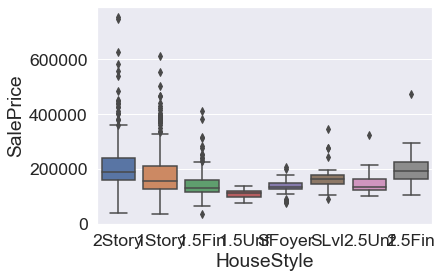

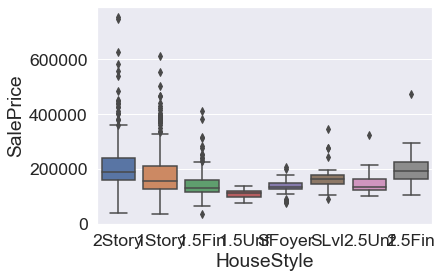

In [161]:
plt.figure(1)
sns.boxplot(x="HouseStyle", y='SalePrice', data=data_categorical)
plt.figure(2)
sns.boxplot(x="HouseStyle", y='SalePrice', data=data_categorical)
# deal with categorical data
# data_matrix = data_numerical.as_matrix()

# features = mutual_info_regression(data_matrix, data_numerical['SalePrice'].as_matrix())
# features

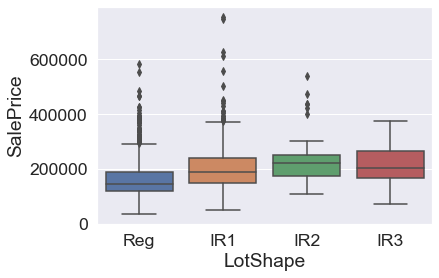

In [116]:
# f, axes = plt.subplots(2, 1)
# colcnt, rowcnt = 0, 0
# for i, colname in enumerate(list(data_categorical.columns)[1:5]):
#     sns.boxplot(x="Alley", y='SalePrice', data=data_categorical, ax=axes[rowcnt, colcnt])
#     rowcnt, colcnt = (rowcnt+1)%2, (colcnt+1)%2



In [155]:
bath_vars = [x for x in list(data_numerical.columns) if 'Bath' in x]
bath_vars

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [156]:
# combine all bath variables into one 
data.loc[:,'TotalBaths'] = data_numerical['BsmtFullBath'] + 0.5 * data_numerical['BsmtHalfBath'] + 0.5 * data_numerical['HalfBath'] + data_numerical['FullBath']
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths
839,840,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,6,1946,1995,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,352,Unf,0,416,768,GasA,Ex,Y,SBrkr,768,432,0,1200,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1946.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130500,1.0
55,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490,Unf,0,935,1425,GasA,Gd,Y,SBrkr,1425,0,0,1425,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1964.0,RFn,2,576,TA,TA,Y,0,0,0,407,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,180500,2.0
755,756,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,894.0,TA,TA,PConc,Gd,TA,No,GLQ,381,Unf,0,348,729,GasA,Gd,Y,SBrkr,742,729,0,1471,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1999.0,Unf,2,440,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,172500,2.5
837,838,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,158.0,TA,TA,CBlock,TA,TA,No,BLQ,330,Unf,0,153,483,GasA,TA,Y,SBrkr,483,504,0,987,1,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,100000,2.5
694,695,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,6,1936,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,927,927,GasA,TA,Y,SBrkr,1067,472,0,1539,0,0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1995.0,Unf,2,576,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,141500,1.5


In [159]:
data['TotalSF'] = data['GrLivArea'] + data['TotalBsmtSF']

In [67]:
# categorize the string column "city", leave zipcode and country alone as they don't matter
bsmtqual = data["BsmtQual"].apply(lambda x: 'None' if x is np.nan else x).astype("category")
bsmtqual.cat.codes.unique()

array([2, 4, 0, 3, 1], dtype=int64)

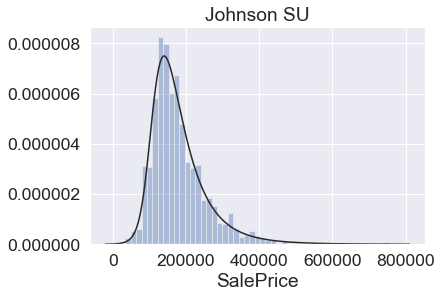

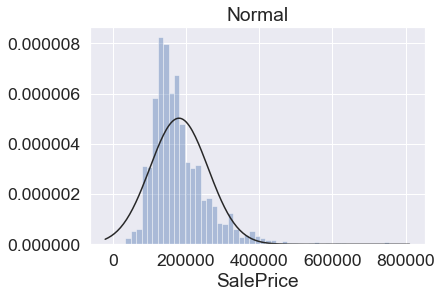

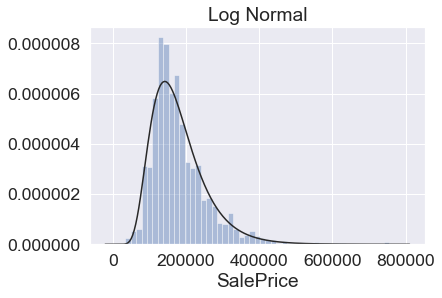

In [165]:
y = data['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)


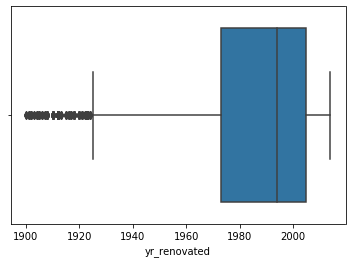

In [92]:
sns.boxplot(data['yr_renovated'])

In [60]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3-q1
iqr

price            332087.50
bedrooms              1.00
bathrooms             0.75
sqft_living        1160.00
sqft_lot           6000.50
floors                1.00
waterfront            0.00
view                  0.00
condition             1.00
sqft_above         1110.00
sqft_basement       610.00
yr_built             46.00
yr_renovated       1999.00
city_cat             18.00
dtype: float64

In [158]:
# print(data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))

In [89]:
data.loc[data['yr_renovated'] == 0, 'yr_renovated'] = data['yr_built'] 

In [90]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,city_cat,house_age
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,36,64
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA,35,98
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA,18,53
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,857 170th Pl NE,Bellevue,WA 98008,USA,3,56
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,31,43
